### HW Day 19

Your goal is to build a simple perceptron classifier that can tell the difference between TWO types of wheat.

You will use Seed Area and Asymetry coefficient to predict whether a wheat seed is Canadian or Rosa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# This block of code reads in the data from the URR as a pandas data frame and then displays the first few rows.
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/seeds_dataset_exam2.csv'
df = pd.read_csv(URL)
df.head()

,Area,Asymmetry Coef,Seed Type
0,15.26,2.221,kama
1,14.88,1.018,kama
2,14.29,2.699,kama
3,13.84,2.259,kama
4,16.14,1.355,kama


['canadian', 'kama', 'rosa']
(140, 2)
(140,)


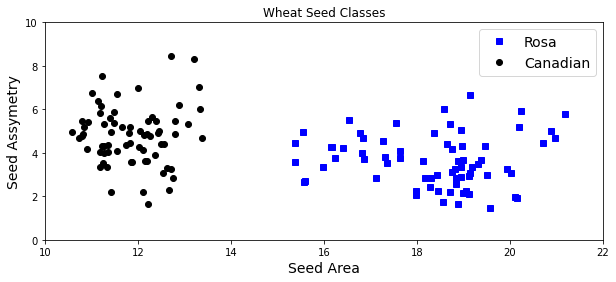

In [2]:
# Encode the labels for the seed types
le = LabelEncoder()
le.fit(df['Seed Type'])
print(list(le.classes_))

# Select the data we want to use in our model
Xdata = df[['Area','Asymmetry Coef']].to_numpy()
ydata = le.transform(df['Seed Type'])

# Remove the data associated with Kama so we are only focused on Canadian vs Rosa
X = Xdata[ydata!=1,]
y = ydata[ydata!=1]

# Show the shape of the data
print(X.shape)
print(y.shape)

# Plot the data for the two classes
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "bs", label="Rosa")
plt.plot(X[y==0, 0], X[y==0, 1], "ko", label="Canadian")

plt.xlabel("Seed Area", fontsize=14)
plt.ylabel("Seed Assymetry", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
plt.axis([10, 22, 0, 10])
plt.title('Wheat Seed Classes')
plt.show()

## Your Job:  Train a Perceptron Model to Distinguish between Rosa and Canadian

- Please fill in the code blocks below and add your words in the Markdown Cells.
- Please remember we are looking for LOTS OF WORDS, describing your process!

In [3]:
# Check how many data points we have left


#### Your Comments:
Is this a lot or a little data? Comment on the graph of the data. What are the ranges for x1 and x2? Does your data seem to be a good candidate for a perceptron model which will put a straight line decision boundary?

Our data is fiarly small with only 140 data points for each feature.  Based on the scatter plot above, it seems reasonable for a perceptron model because there is a distinct gap between the two 'clusters' where a decision boundary could be placed betwee.

In [17]:
# Split the data into testing and training with a test_size of 0.1, a random state of 20 ##IM CHOOSING 10
# Also tell train_test_split to use a stratified split equal to y
RN = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, stratify=y, random_state=RN)
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)

# Use standard scaler to scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
scaler.fit(X_test) 

X_train_scale = scaler.transform(X_train) # scale training data
X_test_scale = scaler.transform(X_test) # scale testing data


Size of X_train: (126, 2)
Size of X_test: (14, 2)
Size of y_train: (126,)
Size of y_test: (14,)


It is helpful to take a stratified split when seperating the data into training and testing groups because it seeks to ensure that each fold is representative of all strata of the data.  Also I tried other random states besides 20, and 10 worked really well where the desicion boundary seemed very centered in the gap between the two groups. 

After scaling our data, I can plot the scaled points to look at the ranges.  Our original range with unscaled data was from x = 10 to x = 14 for X_1 (give or take) and 15 to 21 for X_2.  The scaled data is on a smaller range.  We can visually estimate the range like we did for the unscaled data, but instead I used the `np.ptp` command.  

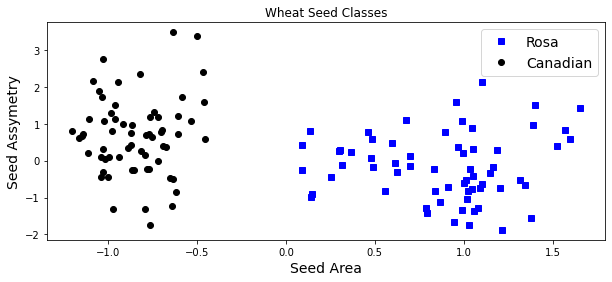

range of X1: 2.85148725976502
range of X2: 5.351657561860069


In [18]:
plt.figure(figsize=(10, 4))
plt.plot(X_train_scale[y_train==2, 0], X_train_scale[y_train==2, 1], "bs", label="Rosa")
plt.plot(X_train_scale[y_train==0, 0], X_train_scale[y_train==0, 1], "ko", label="Canadian")

plt.xlabel("Seed Area", fontsize=14)
plt.ylabel("Seed Assymetry", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
plt.title('Wheat Seed Classes')
plt.show()

#print(np.ptp(X_train_scale ,axis=1))
print("range of X1:", np.ptp(X_train_scale[:,0]))
print("range of X2:",np.ptp(X_train_scale[:,1]))

I recieved a range of `X1: 3.359` and `X2: 6.436`.  This seems significantly larger than what is visualized in the plot because X1 should be a range of 1 (-1.5 to -.5) and the range of X2  should be about 2.  I tried taking the `max - min` of each column and recieved the same results.  My guess for this discrepency from what I see and what I get from the command, is that the code is calculating the range while the Kama data set is still there.  Either way, the range is helpful to know to build the axes for the visualizing of the decision boundary and data.

It is important to scale your data because many times the data if of different magnitudes, units and range. When doing distance calculations it is vital to have things on similar scales so each point weighs roughly the same.  Scaling typically improves accurancy and becomes even more important for data sets with lots of features.

### Your Comments:
You should address why we choose a stratified split. You should also comment on why in this case it is important to scale the data using StandardScaler().

In [19]:
# Define and train (fit) a Perceptron model with 1000 interations, tol=1e-3, a learning rate of 0.5,
# use the same random state you used above, and set verbose=1.

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=RN, verbose=1)
per_clf.fit(X_train_scale, y_train)

-- Epoch 1
Norm: 2.16, NNZs: 2, Bias: 1.000000, T: 126, Avg. loss: 0.011493
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.16, NNZs: 2, Bias: 1.000000, T: 252, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.16, NNZs: 2, Bias: 1.000000, T: 378, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.16, NNZs: 2, Bias: 1.000000, T: 504, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.16, NNZs: 2, Bias: 1.000000, T: 630, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.16, NNZs: 2, Bias: 1.000000, T: 756, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.16, NNZs: 2, Bias: 1.000000, T: 882, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=20, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=1, warm_start=False)

### Your Comments:
What do all the outputs mean. You didn't give it an alpha value, what does alpha=0.0001 mean? What parameters could you play with here and what would they do?

Alpha is a parameter for regularization term that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.


source: scikit learn index

In [20]:
# Lets look at the coefficients that were saved by the model
# In this case they apply to the scaled data!
print(per_clf.coef_)
print(per_clf.intercept_)

[[ 2.15698298 -0.1391882 ]]
[1.]


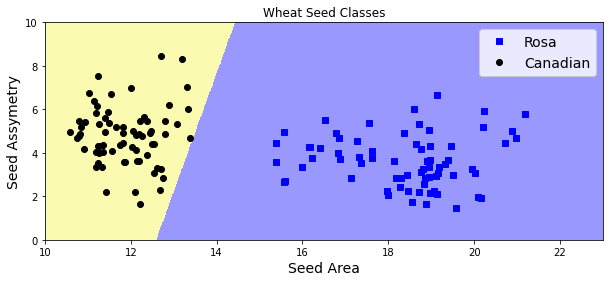

In [21]:
# Plot your decision boundary

# Update your axis so it matches the plot of the data above
axes = [10, 23, 0, 10]

# Get the grid of values over which you will predict
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# Scale the new values
X_new_scale = scaler.transform(np.c_[x0.ravel(), x1.ravel()])

# Make your prediction on the scaled values
y_predict = per_clf.predict(X_new_scale)
zz = y_predict.reshape(x0.shape)

# Plot the origial data
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "bs", label="Rosa")
plt.plot(X[y==0, 0], X[y==0, 1], "ko", label="Canadian")

# Create a contour map of the decision boundaries
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# Labels
plt.xlabel("Seed Area", fontsize=14)
plt.ylabel("Seed Assymetry", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
#plt.axis(axes)
plt.title('Wheat Seed Classes')

plt.show()

### Your comments:
What does this graph show? Does the decision boundary at least seem reasonable?

In [22]:
# Report our accuracy
y_predict=per_clf.predict(X_test_scale)
score=y_predict==y_test
print("Testing Accuracy: ", score.sum()/len(score))

y_predict=per_clf.predict(X_train_scale)
score=y_predict==y_train
print("Training Accuracy: ", score.sum()/len(score))

Testing Accuracy:  1.0
Training Accuracy:  1.0


### Your Comments:
Could you have predicted this accuracy from looking at the graph? How did you do?

The accuracy is 1.0 and just by looking at the plot we can tell that the line perfectly splits the two groups where 100% of a group are on either side of the boundary.

### Now - rerun the code for some different parameter values:
- can you select values that make the model not run so well
- values that put the decision boundary at a visually better or worse place
- what would happen if you didn't scale your data first?

### Your Comments:






### trying to make bad model

I could make a bad model but not scaling the data before creating the model.  I did this by accident earlier and the decision boundary gets extremely messed up. However, I tried many variations of parameters for `max_iter`, `tol`, `alpha`, `eta0`, and I couldn't get the model to appear significantly worse. 

-- Epoch 1
Norm: 1.08, NNZs: 2, Bias: 0.500000, T: 126, Avg. loss: 0.005746
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 2, Bias: 0.500000, T: 252, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 2, Bias: 0.500000, T: 378, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 2, Bias: 0.500000, T: 504, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.08, NNZs: 2, Bias: 0.500000, T: 630, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 2, Bias: 0.500000, T: 756, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
[[ 1.07849149 -0.0695941 ]]
[0.5]


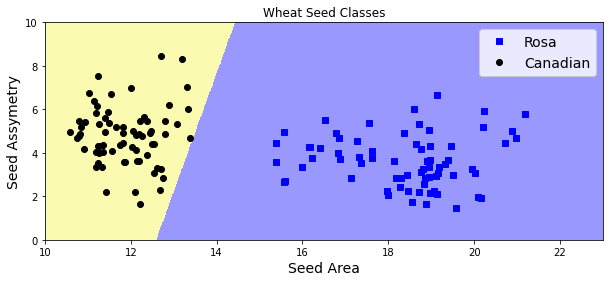

In [31]:
per_clf = Perceptron(max_iter=10, tol=1, alpha = 100000, eta0=0.5, random_state=RN, verbose=1)
per_clf.fit(X_train_scale, y_train)

# Lets look at the coefficients that were saved by the model
# In this case they apply to the scaled data!
print(per_clf.coef_)
print(per_clf.intercept_)

# Plot your decision boundary

# Update your axis so it matches the plot of the data above
axes = [10, 23, 0, 10]

# Get the grid of values over which you will predict
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# Scale the new values
X_new_scale = scaler.transform(np.c_[x0.ravel(), x1.ravel()])

# Make your prediction on the scaled values
y_predict = per_clf.predict(X_new_scale)
zz = y_predict.reshape(x0.shape)

# Plot the origial data
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "bs", label="Rosa")
plt.plot(X[y==0, 0], X[y==0, 1], "ko", label="Canadian")

# Create a contour map of the decision boundaries
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# Labels
plt.xlabel("Seed Area", fontsize=14)
plt.ylabel("Seed Assymetry", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
#plt.axis(axes)
plt.title('Wheat Seed Classes')

plt.show()

### trying to make a better model

The best thing I could do to make a better model was to change the random state to 10.  I attempted to make the decision boundary more vertical but messing with alpha from 0.0001 to 10000 did not do much to the angle of the decision boundary.

-- Epoch 1
Norm: 2.07, NNZs: 2, Bias: 0.500000, T: 126, Avg. loss: 0.008990
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.98, NNZs: 2, Bias: 0.000000, T: 252, Avg. loss: 0.012176
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.98, NNZs: 2, Bias: 0.500000, T: 378, Avg. loss: 0.000027
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.98, NNZs: 2, Bias: 0.500000, T: 504, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.98, NNZs: 2, Bias: 0.500000, T: 630, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.98, NNZs: 2, Bias: 0.500000, T: 756, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.98, NNZs: 2, Bias: 0.500000, T: 882, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.98, NNZs: 2, Bias: 0.500000, T: 1008, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 8 epochs took 0.00 seconds
[[ 2.95255677 -0.42514523]]
[0.5]


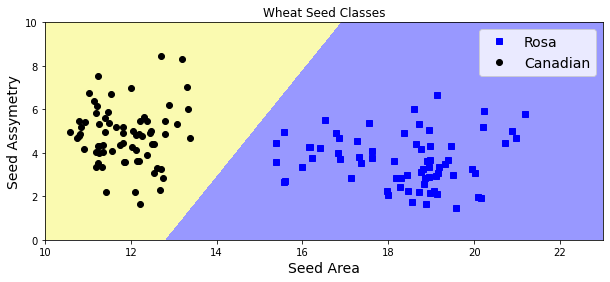

In [37]:
per_clf = Perceptron(max_iter=1000, tol=0.001, alpha = 10000, eta0=0.5, random_state=10, verbose=1)
per_clf.fit(X_train_scale, y_train)

# Lets look at the coefficients that were saved by the model
# In this case they apply to the scaled data!
print(per_clf.coef_)
print(per_clf.intercept_)

# Plot your decision boundary

# Update your axis so it matches the plot of the data above
axes = [10, 23, 0, 10]

# Get the grid of values over which you will predict
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# Scale the new values
X_new_scale = scaler.transform(np.c_[x0.ravel(), x1.ravel()])

# Make your prediction on the scaled values
y_predict = per_clf.predict(X_new_scale)
zz = y_predict.reshape(x0.shape)

# Plot the origial data
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "bs", label="Rosa")
plt.plot(X[y==0, 0], X[y==0, 1], "ko", label="Canadian")

# Create a contour map of the decision boundaries
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# Labels
plt.xlabel("Seed Area", fontsize=14)
plt.ylabel("Seed Assymetry", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
#plt.axis(axes)
plt.title('Wheat Seed Classes')

plt.show()

### model without scaling data

Visually, the plot of the unscaled model looks significantly worse where the boundary intersects the two groups.  Regardless, the accuracy still isn't too bad, but it is still important to scale the data.  It seems unlikely that the decision boundary would work nicely on new data.

[[ 21.555  -50.0985]]
[-51.]


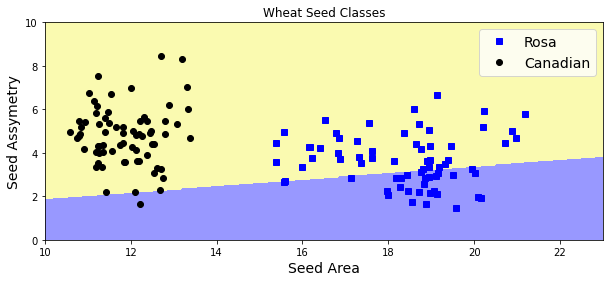

Testing Accuracy:  0.9285714285714286
Training Accuracy:  0.8650793650793651


In [40]:
per_clf = Perceptron(max_iter=1000, tol=0.001, alpha = 10000, eta0=0.5, random_state=10, verbose=0)
per_clf.fit(X_train, y_train)

# Lets look at the coefficients that were saved by the model
# In this case they apply to the scaled data!
print(per_clf.coef_)
print(per_clf.intercept_)

# Plot your decision boundary

# Update your axis so it matches the plot of the data above
axes = [10, 23, 0, 10]

# Get the grid of values over which you will predict
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# Scale the new values
X_new_scale = scaler.transform(np.c_[x0.ravel(), x1.ravel()])

# Make your prediction on the scaled values
y_predict = per_clf.predict(X_new_scale)
zz = y_predict.reshape(x0.shape)

# Plot the origial data
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "bs", label="Rosa")
plt.plot(X[y==0, 0], X[y==0, 1], "ko", label="Canadian")

# Create a contour map of the decision boundaries
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# Labels
plt.xlabel("Seed Area", fontsize=14)
plt.ylabel("Seed Assymetry", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
#plt.axis(axes)
plt.title('Wheat Seed Classes')

plt.show()

# Report our accuracy
y_predict=per_clf.predict(X_test)
score=y_predict==y_test
print("Testing Accuracy: ", score.sum()/len(score))

y_predict=per_clf.predict(X_train)
score=y_predict==y_train
print("Training Accuracy: ", score.sum()/len(score))